# Simple Regression Modeling with Boston Housing dataset - Lab

In this final lab, we shall apply the regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We performed a detailed EDA for this dataset in earlier section and hence carry a good understanding of how this dataset is composed. This this lab we shall try to identify the predictive ability of some of features found in this dataset towards identifying house price. 

### Objectives:
You will be able to:
* Build many linear models with boston housing data set using OLS
* For each model, analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

Let's get started. 

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')

In [2]:
df = pd.read_csv('BostonHousing.csv')

The data features and target are present as columns in boston data. Boston data gives a set of independent as independent variables in data and the housing rate as `MEDV` in target property. Also feature names are listed in feature_names. The desription is available at [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB
None


The Boston data frame has 506 rows and 14 columns.
This data frame contains the following columns:
* **crim**: per capita crime rate by town.
* **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **indus**: proportion of non-retail business acres per town.
* **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **nox**: nitrogen oxides concentration (parts per 10 million).
* **rm**: average number of rooms per dwelling.
* **age**: proportion of owner-occupied units built prior to 1940.
* **dis**: weighted mean of distances to five Boston employment centres.
* **rad**: index of accessibility to radial highways.
* **tax**: full-value property-tax rate per 10,000.
* **ptratio**: pupil-teacher ratio by town.
* **black**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* **lstat**: lower status of the population (percent).
* **medv**: median value of owner-occupied homes in $1000s.

### Create histograms for all variables in the dataset and comment on their shape (uniform or not ?)

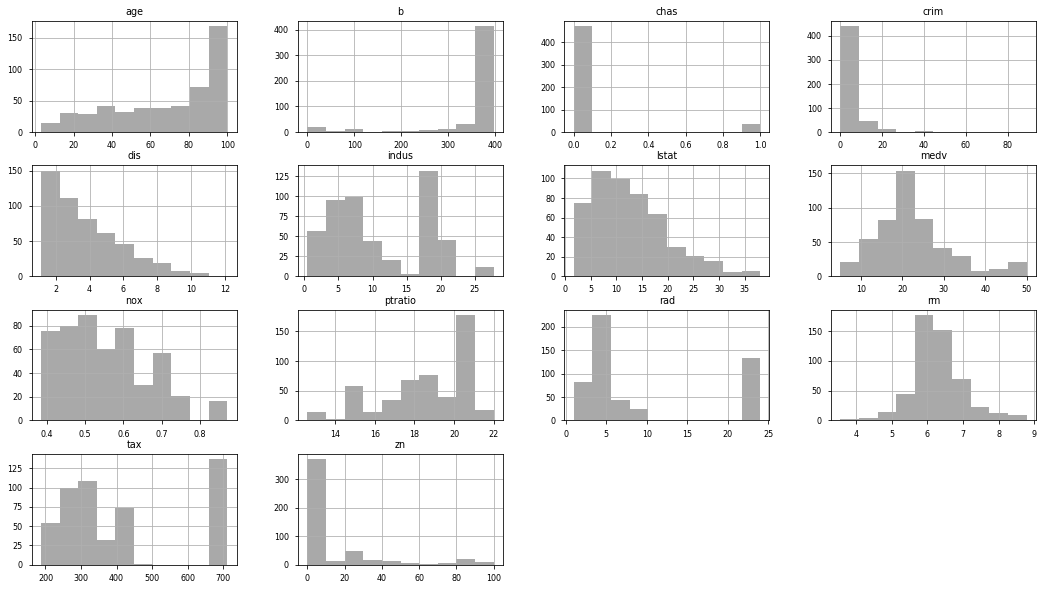

In [5]:
df.hist(figsize=(18,10), color='darkgrey');

In [6]:
# You observations here:

**A lot of skewness and kurtosis in most variables, some have outliers at extreme tails.**

more or less normally distributed:
* **medv** = target variable: median value of owner-occupied homes in $'1000s.
* **rm**: average number of rooms per dwelling.

left-skewed resp. negatively skewed:
* **age**: proportion of owner-occupied units built prior to 1940.
* **black**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* **ptratio**: pupil-teacher ratio by town.

right-skewed resp. positively skewed:
* **crim**: per capita crime rate by town.
* **dis**: weighted mean of distances to five Boston employment centres.
* **lstat**: lower status of the population (percent).
* **nox**: nitrogen oxides concentration (parts per 10 million).
* **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.

irregular distributions:
* **indus**: proportion of non-retail business acres per town.
* **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **rad**: index of accessibility to radial highways.
* **tax**: full-value property-tax rate per 10,000.

Based on this, we shall choose a selection of features which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [7]:
df_new = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
df_new.head()

# other way: df = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']].copy()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots and comment on the results

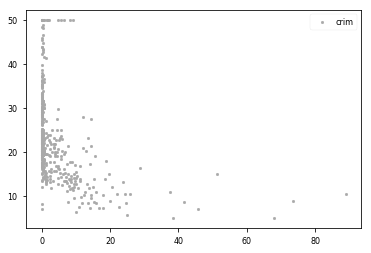

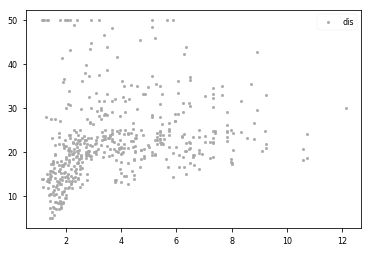

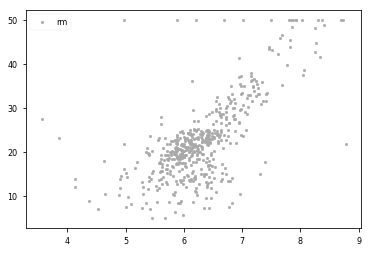

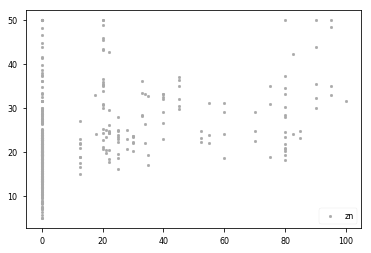

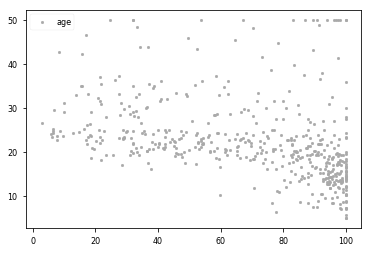

In [8]:
for column in ['crim', 'dis', 'rm', 'zn', 'age']:
    plt.scatter(df_new[column], df_new.medv, label=column, marker='.', color='darkgrey')
    plt.legend()
    plt.show()

In [9]:
# Your observations here 

* linear relationship between predictor and target exists only for predictor "rooms".
* unclear, whether relationship in crim is linear
* outliers present in almost all cases
* Data probably needs more normalization and pre-processing to "Clean it up"

Okie so obviously our data needs a lot of pre-procesing to improve the results. This key behind such kaggle competitions is to process the data in such a way that we can identify the relationships and make predictions in the best possible way. For now, we shall leave the dataset untouched and just move on with regression. So far, our assumptions, although not too strong, but still hold to a level that we can move on. 

### Let's do Regression 

Right here is the real deal. Let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). We shall do this is a loop and in every iteration, we shall pick one of the independent variables  perform following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`.
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~crim
-------------------------------------------------------------------------------------


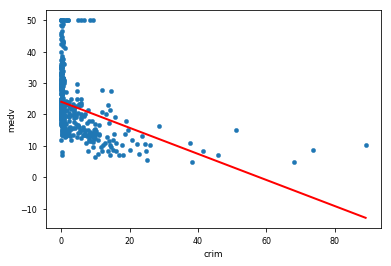

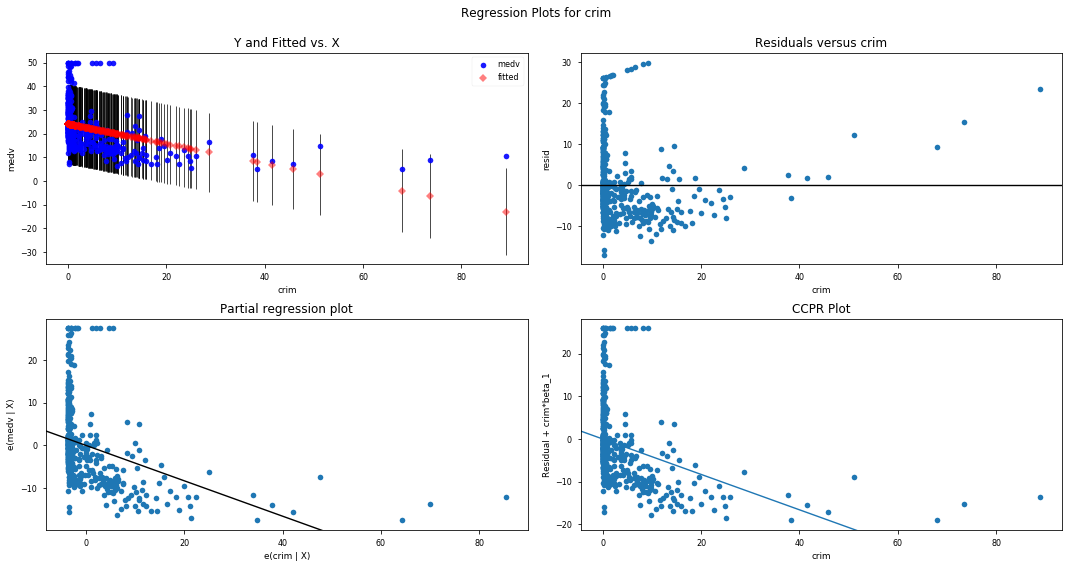

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~dis
-------------------------------------------------------------------------------------


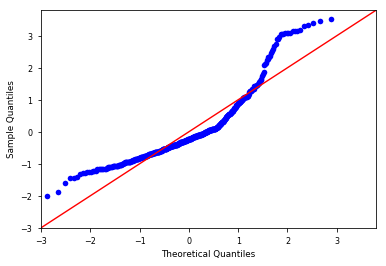

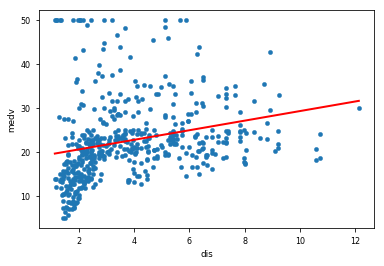

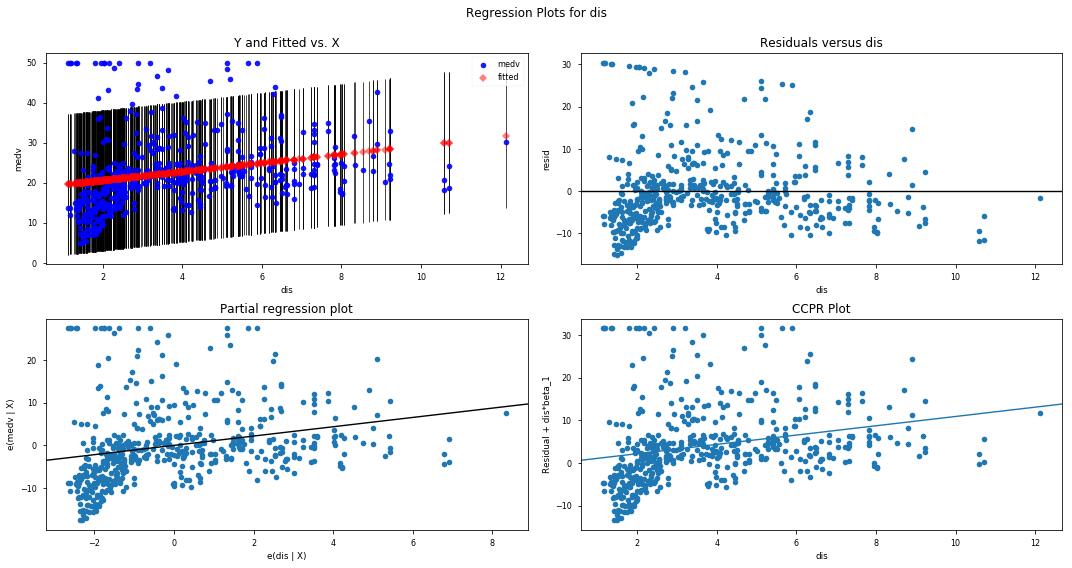

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~rm
-------------------------------------------------------------------------------------


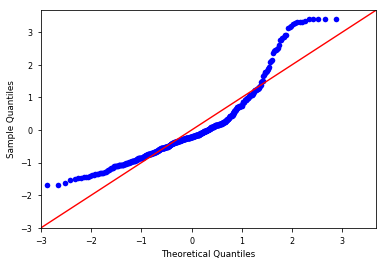

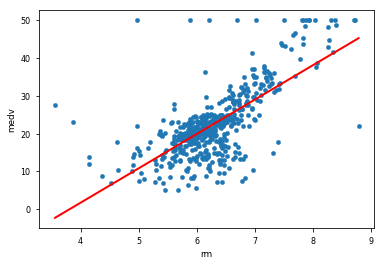

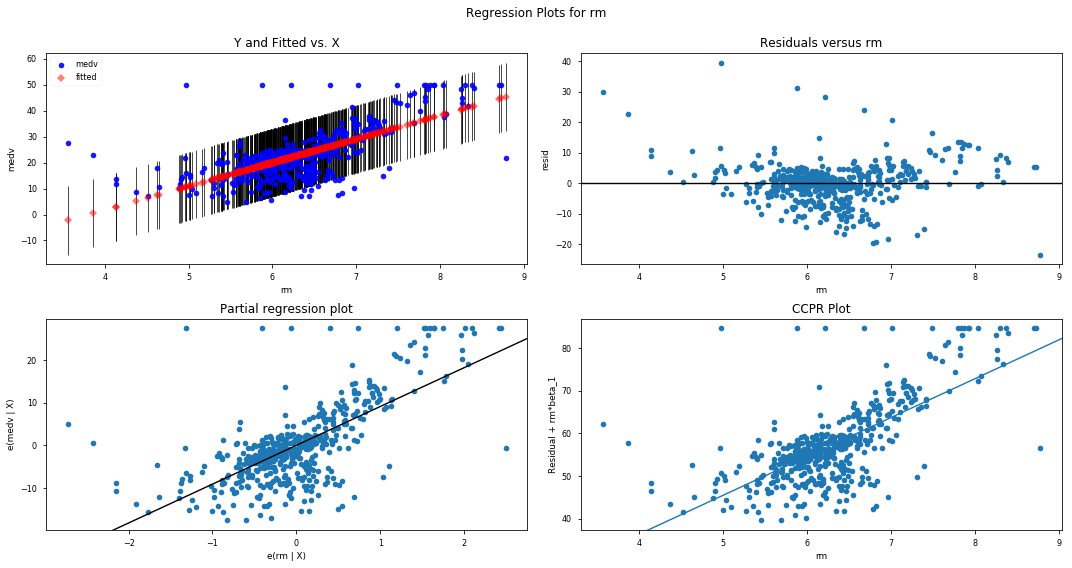

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~zn
-------------------------------------------------------------------------------------


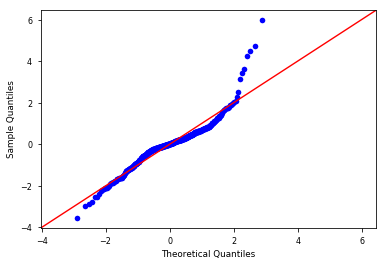

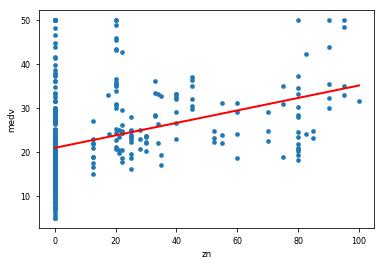

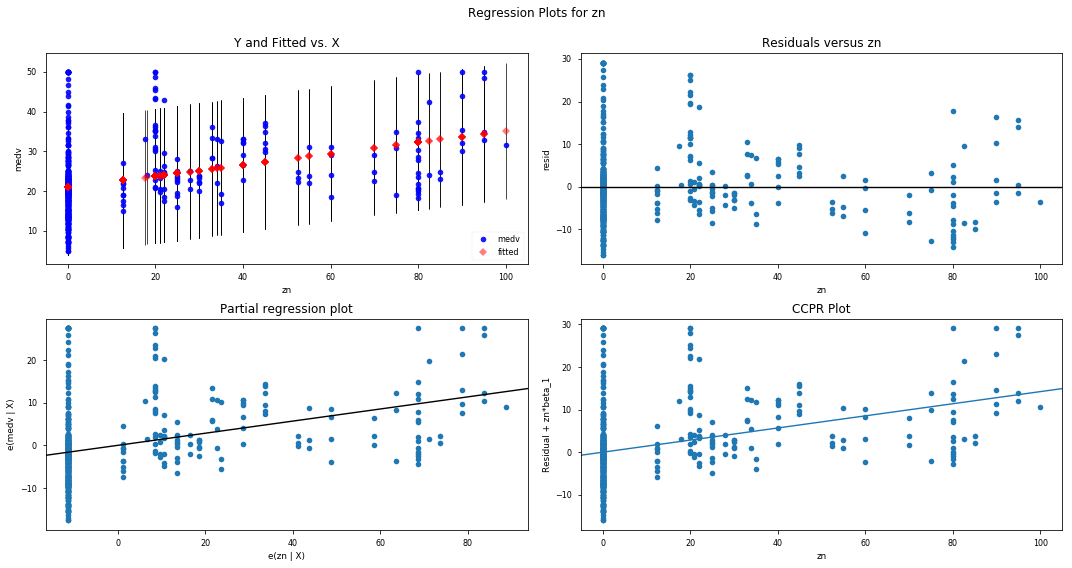

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~age
-------------------------------------------------------------------------------------


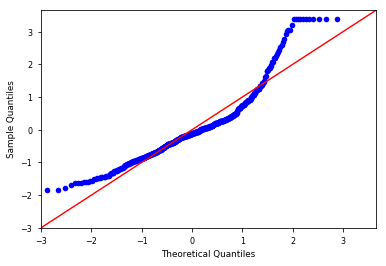

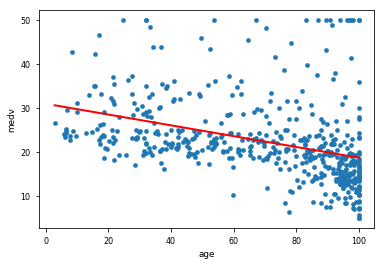

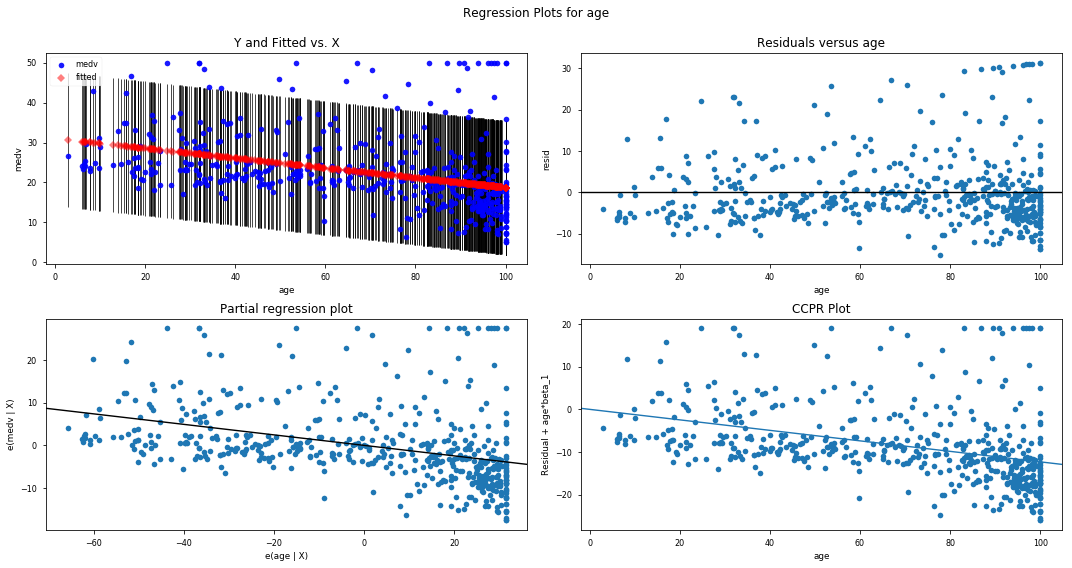

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Press Enter to continue...


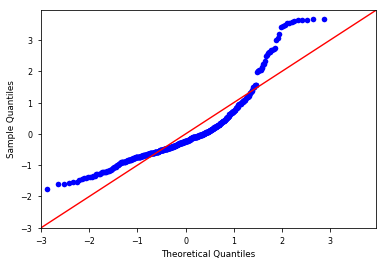

In [13]:
# Create array to store the following values in for each iteration
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]

# Create loop for regression
for idx, col in enumerate(['crim', 'dis', 'rm', 'zn', 'age']):
    
    print ("Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~" + col)
    print ("-------------------------------------------------------------------------------------")
    
    # Run a simple OLS regression
    f = 'medv~' + col
    model = smf.ols(formula=f, data=df_new).fit()
    
    # Plot a regression line on the scatter plots
    X_new = pd.DataFrame({ col: [ df_new[col].min(), df_new[col].max() ] });
    Y_pred = model.predict(X_new)
    df_new.plot(kind='scatter', x=col, y='medv');
    plt.plot(X_new, Y_pred, c='red', linewidth=2);
    plt.show()
    
    # Plot the residuals using sm.graphics.plot_regress_exog()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()
    
    # Plot a Q-Q plot for regression residuals normality test
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.show()
    
    # Store values in array
    results.append([col, model.rsquared, model.params[0], model.params[0], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    
    input("Press Enter to continue...")

In [14]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,crim,0.15078,24.0331,24.0331,1.17399e-19,295.404
2,dis,0.0624644,18.3901,18.3901,1.20661e-08,305.104
3,rm,0.483525,-34.6706,-34.6706,2.48723e-74,612.449
4,zn,0.129921,20.9176,20.9176,5.71358e-17,262.387
5,age,0.142095,30.9787,30.9787,1.56998e-18,456.983


In [15]:
#Your obervations here 

**Crime Rate**
* Regression Line: negative relationship with price --> less crime = higher price
* R-squared: low r-squared --> not such a good fit 
* Normality of residuals: crime Q-Q plots shows that residuals not normally distributed
* Heteroscedasticity: Crime does not show any clear cone-shape --> no heteroscedasticity 

**Distance to five Boston employment centres**
* Regression Line: positive relationship between dis and medv --> longer distance = higher price
* R-squared: near to 0 --> no fit
* Normality of residuals: dis Q-Q plots shows normality is a bit questionable 
* Heteroscedasticity: dis residual plots show some cone shaped residuals --> some signs of heteroscadasticity

**Average number of rooms**
* Regression Line: rm shows a strong positive relationship --> more rooms = higher price
* R-squared: mediocre value --> good fit
* Normality of residuals: rm Q-Q plots shows a long right tail which hurts normality 
* Heteroscedasticity: rm residuals show no cone shape --> no signs of heteroscdasticity (however some outliers are present)

**Proportion of residential land zoned**
* Regression Line: zn variable scatter shows a lot of variance along y axis ... 
* R-squared: ... and hence gives a very low R-squared value
* Normality of residuals: Normality through Q-Q plots and JB is far from perfect 
* Heteroscedasticity: no clear heteroscedasticity in residuals

**Age (proportion of units built prior to 1940)**
* Regression Line: age has a negative relationship with prices --> younger houses = higher prices
* R-squared: very low --> no fit
* Normality of residuals: Normality through Q-Q plots questionable
* Heteroscedasticity: signs of a cone shape --> some obvious heteroscadasticity

So clearly the results are not highly reliable. the best good of fit i.e. r-squared is witnessed with `rm`. So clearly in this analysis this is our best predictor. 

---
#### So how can we improve upon these results . 
1. Pre-Processing 

This is where pre-processing of data comes in. Dealing with outliers, normalizing data, scaling values etc can help regression analysis get more meaningful results from the given set of data 

2. Advanced Analytical Methods

Simple regression is a very basic analysis techniques and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. In the next section we shall look at multiple regression where we can use multiple features **AT ONCE** to define a relationship with outcome. We shall also look at some pre-processing and data simplification techniques and re-visit the boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the the goodness of fit. 
![](https://i.pinimg.com/originals/e5/a5/1e/e5a51eff1b2133105ebaa9b779106ae2.png)

## Summary 

In this lab, we attempted to bring in all the skills learnt so far to a slighlt detailed dataset. We looked at the outcome of our analysis and realized that the data might need some pre-processing to see a clear improvement in results. We shall pick it up in the next section from this point and bring in data pre-processing techniques along with some assumptions that are needed for multiple regression . 